Falta 1 año entero, desde Oct 2019 a Oct 2020

https://w6.seg-social.es/PXWeb/pxweb/es/Afiliados%20en%20alta%20laboral/Afiliados%20en%20alta%20laboral__Afiliados%20Fin%20de%20mes/03f_02%20%20Afi.%20fin%20de%20mes,%202012_2020%20por%20edad,%20g%C3%A9nero,%20r%C3%A9gimen%20y%20nacionalidad.px/

In [1]:
import pandas as pd
df = pd.read_csv('AfiliadosT.csv', delimiter=';')

In [2]:
df.columns

Index(['Date', 'Age', 'Sex', 'General Spanish', 'General Foreigners',
       'Agrario Spanish', 'Agrario Foreigners', 'Hogar Spanish',
       'Hogar Foreigners', 'Autónomos Spanish', 'Autónomos Foreigners',
       'Carbón Spanish', 'Carbón Foreigners', 'Pesca Spanish',
       'Pesca Foreigners', 'Pesca Autónomos Spa', 'Pesca Autónomos Foreign'],
      dtype='object')

In [3]:
df.head(10)

Date  Age        Sex  General Spanish  General Foreigners  \
0  ene-12   16      VARON              740                 198   
1  ene-12   16      MUJER              507                 163   
2  ene-12   16  NO CONSTA                0                   1   
3  ene-12   17      VARON             2489                 703   
4  ene-12   17      MUJER             1589                 510   
5  ene-12   17  NO CONSTA                0                   0   
6  ene-12   18      VARON             7910                1656   
7  ene-12   18      MUJER             6507                1326   
8  ene-12   18  NO CONSTA                0                   0   
9  ene-12   19      VARON            17742                3197   

   Agrario Spanish  Agrario Foreigners  Hogar Spanish  Hogar Foreigners  \
0              508                 151              1                 0   
1              104                  70              0                 3   
2                0                   0              0                 0   
3             1276                 544              0                 2   
4              322                 227              3                 9   
5                0                   0              0                 0   
6             2714                1098              2                10   
7              682                 418             15                51   
8                0                   0              0                 0   
9             4287                1979              5                46   

   Autónomos Spanish  Autónomos Foreigners  Carbón Spanish  Carbón Foreigners  \
0                 15                     1               0                  0   
1                  7                     3               0                  0   
2                  0                     0               0                  0   
3                 21                     5               0                  0   
4                 11                     2               0                  0   
5                  0                     0               0                  0   
6                799                   204               0                  0   
7                370                   124               0                  0   
8                  0                     0               0                  0   
9               2068                   427               1                  1   

   Pesca Spanish  Pesca Foreigners  Pesca Autónomos Spa  \
0              8                 0                    0   
1              0                 0                    0   
2              0                 0                    0   
3             49                 0                    0   
4              3                 0                    0   
5              0                 0                    0   
6             60                 4                   10   
7              2                 0                    0   
8              0                 0                    0   
9            105                 9                   17   

   Pesca Autónomos Foreign  
0                        0  
1                        0  
2                        0  
3                        0  
4                        0  
5                        0  
6                        0  
7                        0  
8                        0  
9                        0

In [4]:
dictMes = {'ene':'01',
          'feb':'02',
          'mar':'03',
          'abr':'04',
          'may':'05',
          'jun':'06',
          'jul':'07',
          'ago':'08',
          'sep':'09',
          'oct':'10',
          'nov':'11',
          'dic':'12'}
for key, value in dictMes.items():
    df['Date'] = df['Date'].str.replace(key,value)

In [3]:
# Hay que pasar ese -12 a -2012
df['Date'][0]

'01-12'

In [4]:
df['Date'] = df['Date'].str.replace('-', '-20')
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
df.groupby('Sex').sum()

Age  General Spanish  General Foreigners  Agrario Spanish  \
Sex                                                                       
MUJER      229405        563430728            44092819         26092450   
NO CONSTA  229405             2145                 172               97   
VARON      229405        604361834            59908592         28014188   

           Agrario Foreigners  Hogar Spanish  Hogar Foreigners  \
Sex                                                              
MUJER                 5218693       20277668          17596581   
NO CONSTA                  29            194              1123   
VARON                14852131         649056           1333155   

           Autónomos Spanish  Autónomos Foreigners  Carbón Spanish  \
Sex                                                                  
MUJER               97854156               9600195           22015   
NO CONSTA                908                     0               0   
VARON              181914428              16573582          274896   

           Carbón Foreigners  Pesca Spanish  Pesca Foreigners  \
Sex                                                             
MUJER                    416         430853             36304   
NO CONSTA                  0              1                 2   
VARON                  22787        3930700            378033   

           Pesca Autónomos Spa  Pesca Autónomos Foreign  
Sex                                                      
MUJER                   444213                     1831  
NO CONSTA                    1                        0  
VARON                   855801                     6350

In [6]:
# Eliminamos la columna "No consta" para facilitar los cálculos ya que son muy poco
df = df[df['Sex']!= 'NO CONSTA']

In [7]:
 import matplotlib.pyplot as plt
 import numpy as np
 import seaborn as sns

In [8]:
#Pirámide poblacional a Enero de 2015
import datetime as dt
male = df[(df.Sex == 'VARON') & (df['Date'].dt.year == 2021) & (df['Date'].dt.month == 1)]
female = df[(df.Sex == 'MUJER') & (df['Date'].dt.year == 2021) & (df['Date'].dt.month == 1)]
#Lista de las edades que hay
AgeClass = df['Age'].unique().tolist()
AgeClass.sort(reverse = True) # para poner mayores arriba en el gráfico
# Cambio categoria edad para dibujar
male['Age'] = male['Age'].astype('category')
female['Age'] = female['Age'].astype('category')

<ipython-input-8-d1eb34c7daec>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male['Age'] = male['Age'].astype('category')
<ipython-input-8-d1eb34c7daec>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  female['Age'] = female['Age'].astype('category')


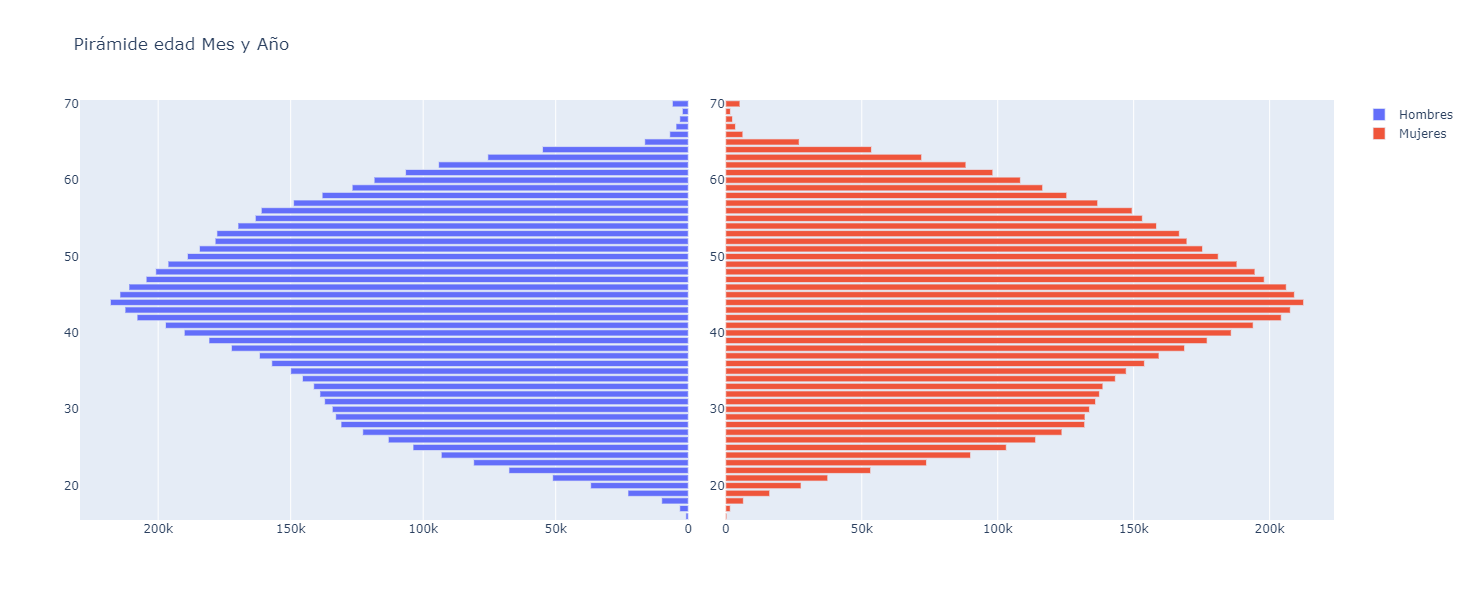

In [9]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
fig = make_subplots(rows=1, cols=2, horizontal_spacing = 0.03)
fig.add_trace(go.Bar(x=male['General Spanish'],y=male['Age'], orientation='h', name = 'Hombres'), row = 1, col = 1)
fig.add_trace(go.Bar(x=female['General Spanish'],y=female['Age'], orientation='h', name = 'Mujeres'), row = 1, col = 2)
fig['layout']['xaxis']['autorange'] = "reversed" # Aquí para invertir xaxis
fig.update_layout(height=600, width=800, title_text="Pirámide edad Mes y Año")
fig.show()

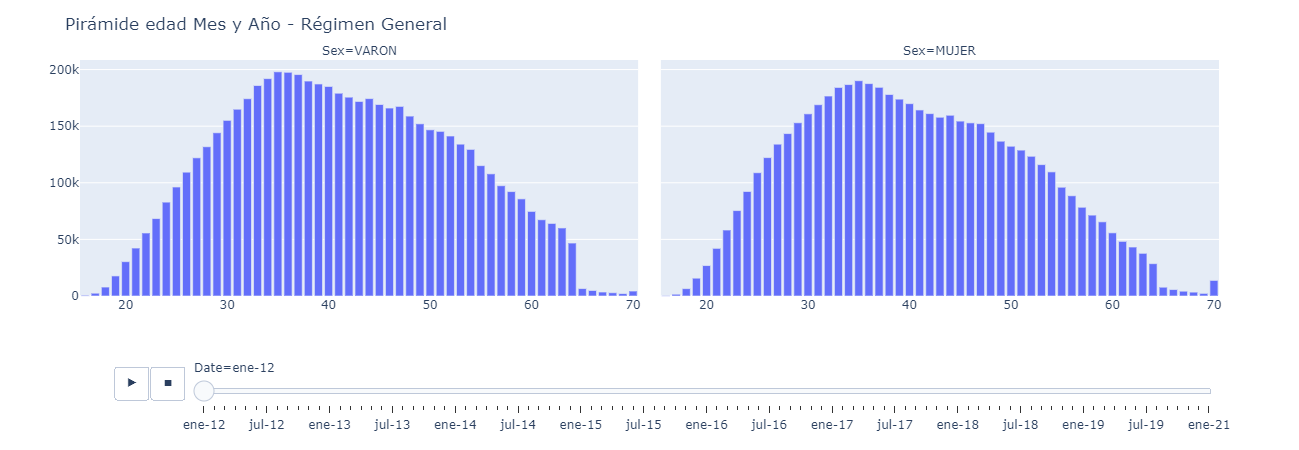

In [10]:
import plotly.express as px

dfA = pd.read_csv('AfiliadosT.csv', delimiter=';')
dfA = dfA[dfA['Sex']!= 'NO CONSTA']
edadGeneral = px.bar(dfA, y='General Spanish', x='Age', facet_col = 'Sex', animation_frame = 'Date',
                    labels={
                        "General Spanish": "",
                        "Age":""
                        
                    })
edadGeneral.update_layout(height=450, width=800, title_text="Pirámide edad Mes y Año - Régimen General")
edadGeneral.show()


In [11]:
edadGeneral.write_html('edadGeneral.html')

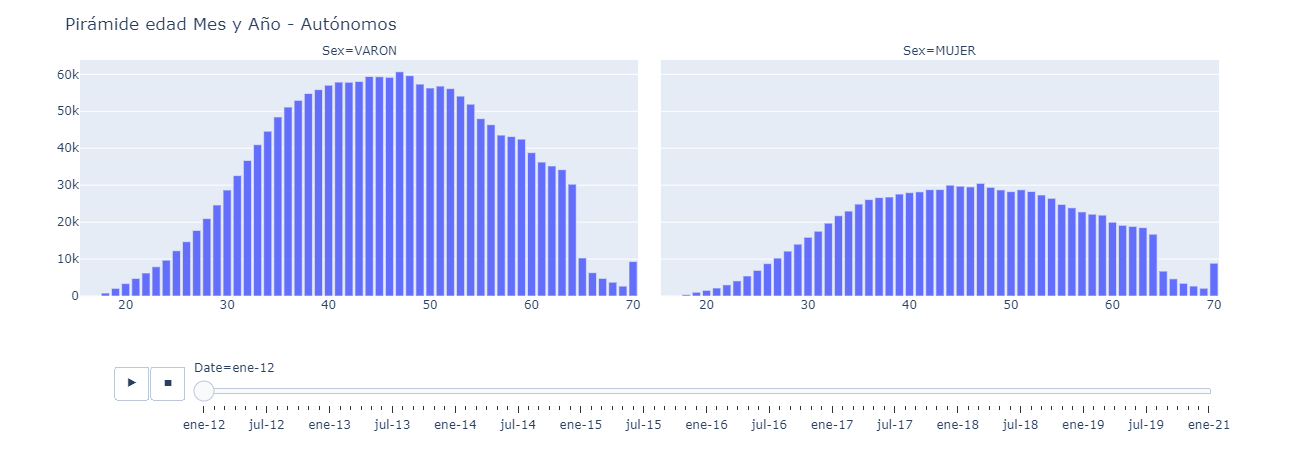

In [12]:
edadAutonomos = px.bar(dfA, y='Autónomos Spanish', x='Age', facet_col = 'Sex', animation_frame = 'Date',
                    labels={
                        "Autónomos Spanish": "",
                        "Age":""
                        
                    })
edadAutonomos.update_layout(height=450, width=800, title_text="Pirámide edad Mes y Año - Autónomos")
edadAutonomos.show()

In [13]:
edadAutonomos.write_html('edadAutonomos.html')

In [14]:
# Sumamos todas las personas afiliadas
suma = ['General Spanish', 'General Foreigners',
       'Agrario Spanish', 'Agrario Foreigners', 'Hogar Spanish',
       'Hogar Foreigners', 'Autónomos Spanish', 'Autónomos Foreigners',
       'Carbón Spanish', 'Carbón Foreigners', 'Pesca Spanish',
       'Pesca Foreigners', 'Pesca Autónomos Spa', 'Pesca Autónomos Foreign']
dfA['total'] = dfA[suma].sum(axis = 1)

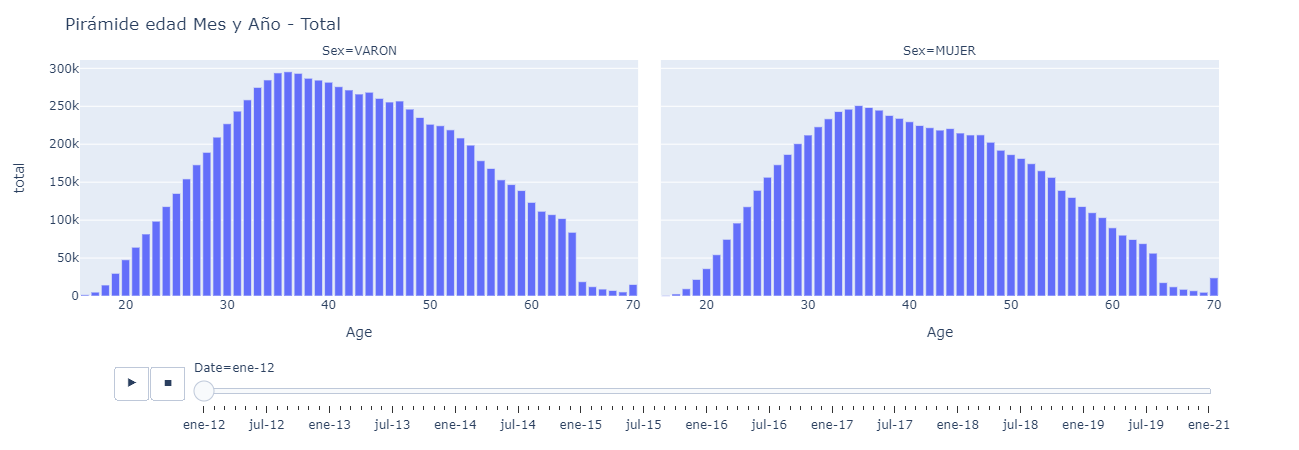

In [15]:
# Total de las personas afiliadas
fig = px.bar(dfA, y='total', x='Age', facet_col = 'Sex', animation_frame = 'Date')
fig.update_layout(height=450, width=800, title_text="Pirámide edad Mes y Año - Total")
fig.show()

In [16]:
# Suma total trabajadores por sector y mes - no importa edad
TotalMes = pd.DataFrame(round(df.set_index('Date').groupby(pd.Grouper(freq='M')).sum(),2))
TotalMes = TotalMes.drop(['Age'],axis = 1) # no importa edad

In [17]:
TotalMes.head()

General Spanish  General Foreigners  Agrario Spanish  \
Date                                                               
2012-01-31         11573394             1038434           595274   
2012-02-29         11549226             1035750           583418   
2012-03-31         11589656             1051168           575539   
2012-04-30         11560631             1056810           573395   
2012-05-31         11559055             1073290           578262   

            Agrario Foreigners  Hogar Spanish  Hogar Foreigners  \
Date                                                              
2012-01-31              246931         108849            169921   
2012-02-29              241666         114104            174003   
2012-03-31              242192         123155            185215   
2012-04-30              244637         123265            181565   
2012-05-31              252031         123448            177429   

            Autónomos Spanish  Autónomos Foreigners  Carbón Spanish  \
Date                                                                  
2012-01-31            2836575                205532            4958   
2012-02-29            2836575                207338            4980   
2012-03-31            2841225                209609            5047   
2012-04-30            2844740                212444            5019   
2012-05-31            2847107                215159            4948   

            Carbón Foreigners  Pesca Spanish  Pesca Foreigners  \
Date                                                             
2012-01-31                606          41627              3964   
2012-02-29                614          43860              4606   
2012-03-31                602          44087              4774   
2012-04-30                602          42202              4817   
2012-05-31                590          44398              4884   

            Pesca Autónomos Spa  Pesca Autónomos Foreign  
Date                                                      
2012-01-31                13602                       53  
2012-02-29                13519                       51  
2012-03-31                13359                       51  
2012-04-30                13130                       48  
2012-05-31                13059                       48

In [18]:
TotalMes.to_csv('TotalMes.csv')

In [19]:
# Stacked 
TotMesStacked = pd.DataFrame(TotalMes.stack(), columns = ['value'])
TotMesStacked.reset_index(inplace = True)
TotMesStacked['value'] = TotMesStacked['value'].astype('float')

In [20]:
#Introducimos columnas
TotMesStacked['Nacionalidad'] = TotMesStacked['level_1'].apply(lambda x: 'YES' if 'Spa' in x else 'NO')
TotMesStacked['type'] = TotMesStacked['level_1'].str.split(' ', n=1, expand = True)[0]
TotMesStacked = TotMesStacked.drop(['level_1'], axis = 1)
TotMesStacked =TotMesStacked[TotMesStacked['value'] > 0]

In [21]:
PenType = pd.DataFrame(TotMesStacked.groupby(['Date','type']).sum())
PenType.reset_index(inplace=True)  
PenType.head()

Date       type       value
0 2012-01-31    Agrario    842205.0
1 2012-01-31  Autónomos   3042107.0
2 2012-01-31     Carbón      5564.0
3 2012-01-31    General  12611828.0
4 2012-01-31      Hogar    278770.0

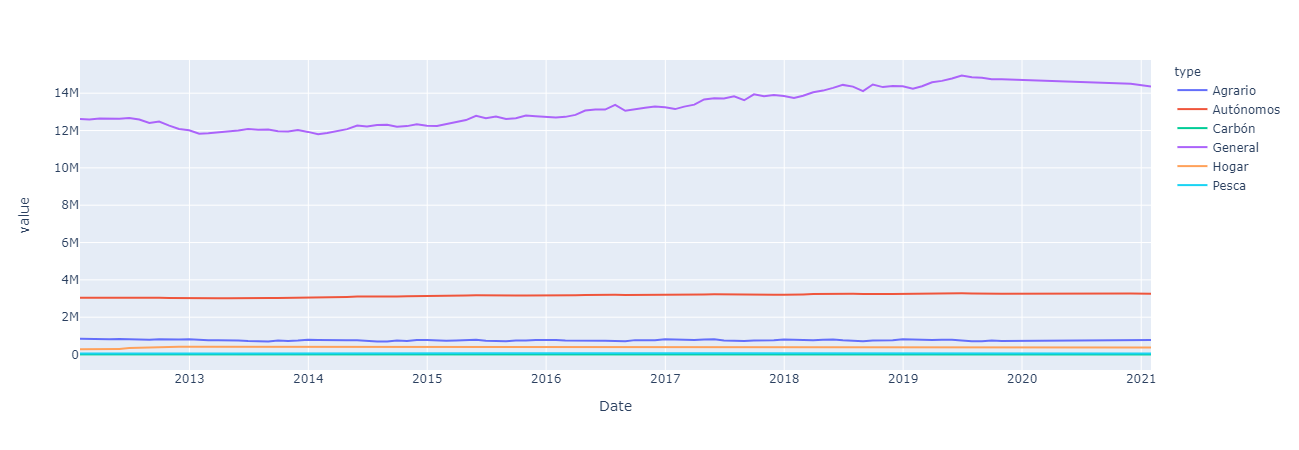

In [22]:
fig = px.line(PenType, x='Date', y = 'value', color = 'type')
fig.show()

In [23]:
PenNac = pd.DataFrame(TotMesStacked.groupby(['Date','Nacionalidad']).sum())
PenNac.reset_index(inplace=True)  
PenNac.head()

Date Nacionalidad       value
0 2012-01-31           NO   1665441.0
1 2012-01-31          YES  15174279.0
2 2012-02-29           NO   1664028.0
3 2012-02-29          YES  15145682.0
4 2012-03-31           NO   1693611.0

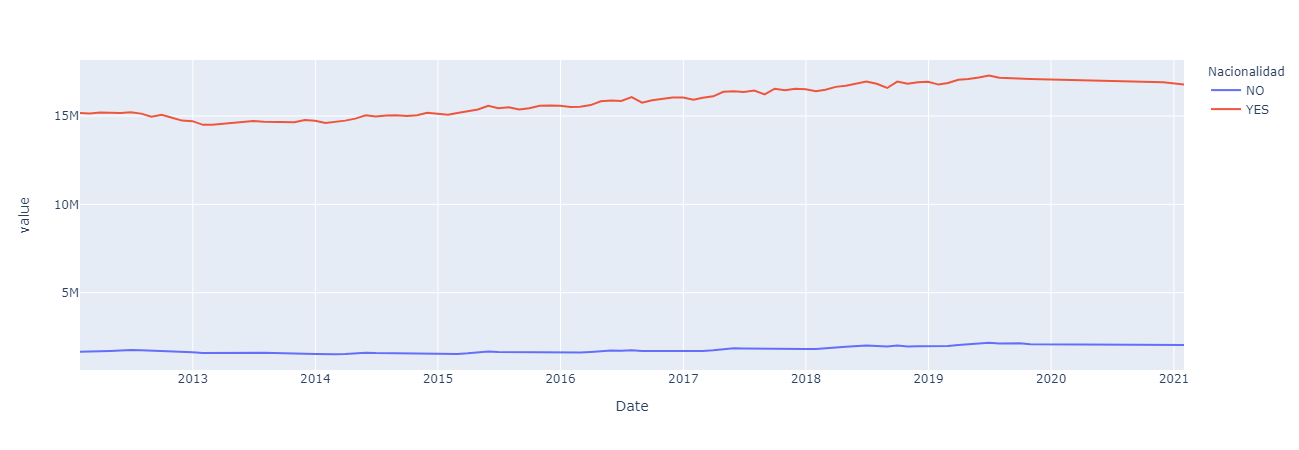

In [24]:
fig = px.line(PenNac, x='Date', y = 'value', color = 'Nacionalidad')
fig.show()

# Edad media

In [25]:
# Sumamos todas las personas afiliadas
suma = ['General Spanish', 'General Foreigners',
       'Agrario Spanish', 'Agrario Foreigners', 'Hogar Spanish',
       'Hogar Foreigners', 'Autónomos Spanish', 'Autónomos Foreigners',
       'Carbón Spanish', 'Carbón Foreigners', 'Pesca Spanish',
       'Pesca Foreigners', 'Pesca Autónomos Spa', 'Pesca Autónomos Foreign']
df['total'] = df[suma].sum(axis = 1)

In [26]:
# Sumo años en cada edad, lo divido por sexos y sumo mensualmente
meanAge = df.copy()
meanAge['años'] = meanAge['Age'] * meanAge['total']
meanAgeMale = meanAge[meanAge['Sex'] == 'VARON']
meanAgeFemale = meanAge[meanAge['Sex'] == 'MUJER']

In [27]:
# Edad media de cada mes.
meanAge.head()

Date  Age    Sex  General Spanish  General Foreigners  \
0 2012-01-01   16  VARON              740                 198   
1 2012-01-01   16  MUJER              507                 163   
3 2012-01-01   17  VARON             2489                 703   
4 2012-01-01   17  MUJER             1589                 510   
6 2012-01-01   18  VARON             7910                1656   

   Agrario Spanish  Agrario Foreigners  Hogar Spanish  Hogar Foreigners  \
0              508                 151              1                 0   
1              104                  70              0                 3   
3             1276                 544              0                 2   
4              322                 227              3                 9   
6             2714                1098              2                10   

   Autónomos Spanish  Autónomos Foreigners  Carbón Spanish  Carbón Foreigners  \
0                 15                     1               0                  0   
1                  7                     3               0                  0   
3                 21                     5               0                  0   
4                 11                     2               0                  0   
6                799                   204               0                  0   

   Pesca Spanish  Pesca Foreigners  Pesca Autónomos Spa  \
0              8                 0                    0   
1              0                 0                    0   
3             49                 0                    0   
4              3                 0                    0   
6             60                 4                   10   

   Pesca Autónomos Foreign  total    años  
0                        0   1622   25952  
1                        0    857   13712  
3                        0   5089   86513  
4                        0   2676   45492  
6                        0  14467  260406

In [28]:
meanAgeMale = pd.DataFrame(round(meanAgeMale.set_index('Date').groupby(pd.Grouper(freq='M')).sum(),2))
meanAgeFemale = pd.DataFrame(round(meanAgeFemale.set_index('Date').groupby(pd.Grouper(freq='M')).sum(),2))
meanAgeMale['mean'] = round(meanAgeMale['años']/meanAgeMale['total'],2)
meanAgeFemale['mean'] = round(meanAgeFemale['años']/meanAgeFemale['total'],2)
meanAgeMale = meanAgeMale[['mean']]
meanAgeFemale = meanAgeFemale[['mean']]
meanAgeMale['Sex'] = 'VARON'
meanAgeFemale['Sex'] = 'MUJER'

In [29]:
meanAge = pd.concat([meanAgeFemale, meanAgeMale])
meanAge = meanAge[meanAge['mean'] > 0]
meanAge['Date'] = meanAge.index
meanAge

mean    Sex       Date
Date                               
2012-01-31  41.13  MUJER 2012-01-31
2012-02-29  41.17  MUJER 2012-02-29
2012-03-31  41.18  MUJER 2012-03-31
2012-04-30  41.22  MUJER 2012-04-30
2012-05-31  41.25  MUJER 2012-05-31
...           ...    ...        ...
2019-09-30  43.20  VARON 2019-09-30
2019-10-31  43.24  VARON 2019-10-31
2020-11-30  43.63  VARON 2020-11-30
2020-12-31  43.66  VARON 2020-12-31
2021-01-31  43.72  VARON 2021-01-31

[194 rows x 3 columns]

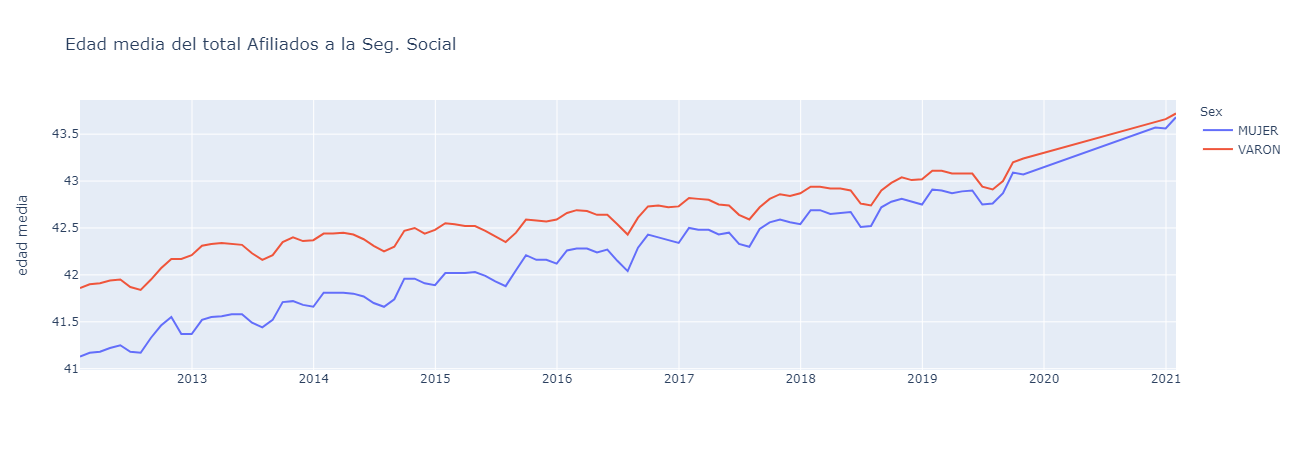

In [30]:
edadMedia = px.line(meanAge, x='Date', y = 'mean', color = 'Sex', title = 'Edad media del total Afiliados a la Seg. Social',
                   labels={
                       "Date":"",
                       "mean":"edad media"
                   })
edadMedia.show()

In [31]:
edadMedia.write_html('edadMedia.html')

In [32]:
# Trabajadores mayores de 55 años en %

Mas55 = pd.DataFrame(df[df['Age']>54].set_index('Date').groupby(pd.Grouper(freq='M')).sum())
Mas55['total55'] = Mas55[suma].sum(axis = 1)
Mas55['total'] = TotalMes[suma].sum(axis = 1)
Mas55['%55'] = round((Mas55['total55']/Mas55['total'])*100,2)
Mas55 = Mas55[Mas55['total']>0]
Mas55 = Mas55[['total', 'total55', '%55']]
Mas55['Date'] = Mas55.index

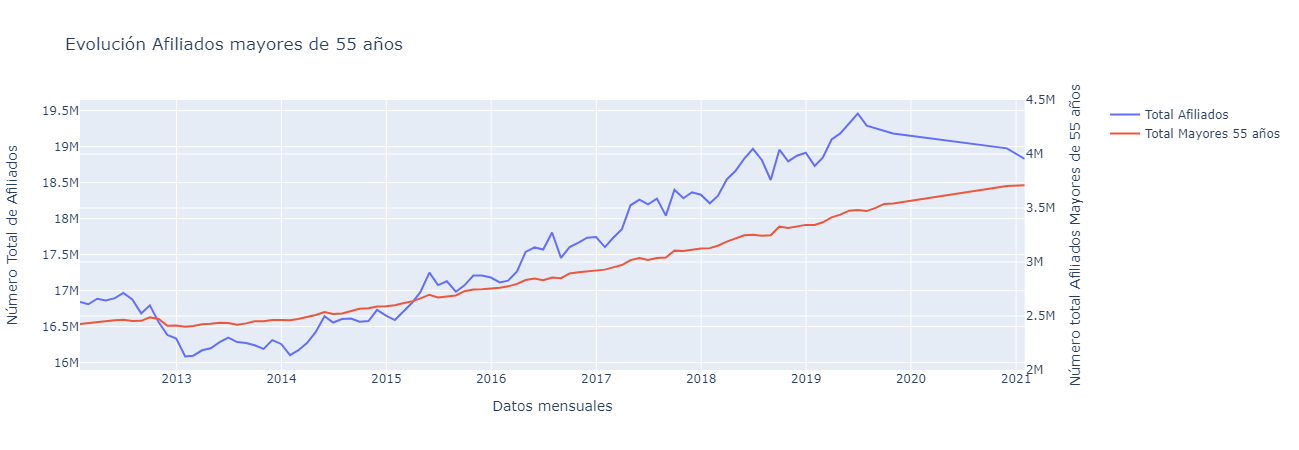

In [33]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Scatter(y = Mas55['total'], x = Mas55['Date'], mode = 'lines', name = 'Total Afiliados'), secondary_y=False,)
fig.add_trace(go.Scatter(y = Mas55['total55'], x = Mas55['Date'], mode = 'lines', name = 'Total Mayores 55 años'), secondary_y = True,)
#fig.add_trace(go.Scatter(y = Mas55['%55'], x = Mas55['Date'], mode = 'lines', name = 'Porcentaje 55 años sobre el total'), secondary_y = True,)

fig.update_layout(
    title_text='Evolución Afiliados mayores de 55 años'
)

# Set x-axis title
fig.update_xaxes(title_text="Datos mensuales")

# Set y-axes titles
fig.update_yaxes(title_text="Número Total de Afiliados", secondary_y=False)
fig.update_yaxes(title_text="Número total Afiliados Mayores de 55 años", secondary_y=True, range = [2000000,4500000])

fig.show()

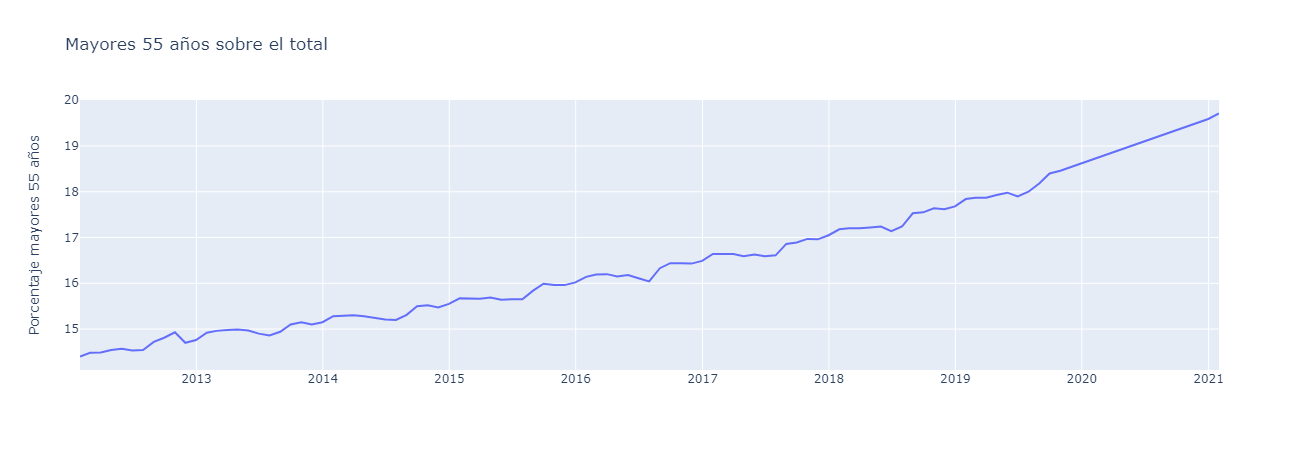

In [34]:
mas55 = px.line(Mas55, x='Date', y = '%55',  title = 'Mayores 55 años sobre el total',
               labels={
                   "%55":"Porcentaje mayores 55 años",
                   "Date":""
               })
mas55.show()

In [35]:
mas55.write_html('mas55.html')

In [45]:
# Cargamos dataset con el nº medi de afiliados totales a la Seg Social
afiliados = pd.read_csv('Afiliaciónmedia.csv', delimiter=';')

In [54]:
afiliados['Fecha'] = pd.to_datetime(afiliados['Fecha'])

In [55]:
afiliados.columns = ['date', 'afiliados']

In [69]:
pib = pd.read_csv('pib.csv', delimiter=';')
pib = pib.iloc[:-8]

In [70]:
pib.columns

Index(['year', 'PIB'], dtype='object')

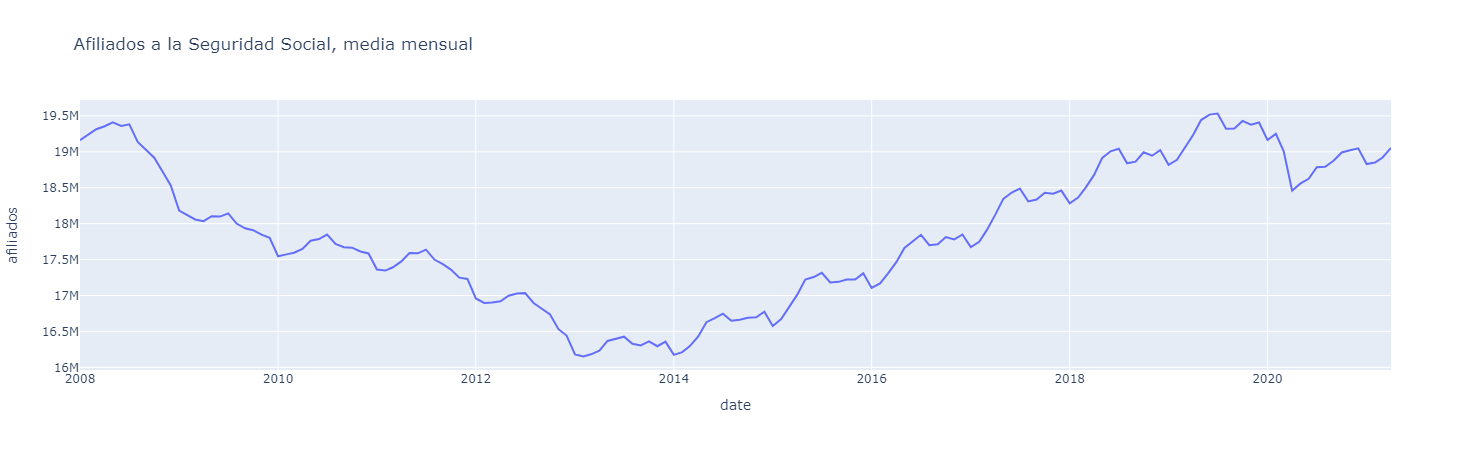

In [71]:
fig = px.line(afiliados, x='date', y = 'afiliados',  title = 'Afiliados a la Seguridad Social, media mensual')
fig.show()

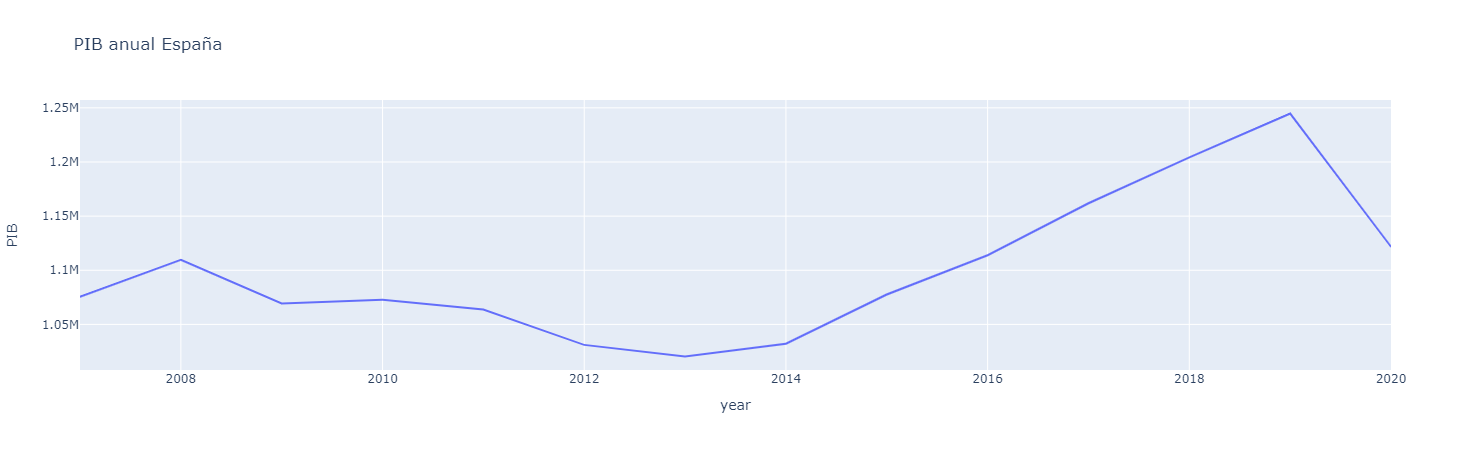

In [72]:
fig = px.line(pib, x='year', y = 'PIB',  title = 'PIB anual España')
fig.show()

In [73]:
afiliados['afiliados'].corr(pib['PIB'])

0.24376877403313005

In [84]:
afiliadosY = pd.DataFrame(afiliados['afiliados'].groupby(afiliados['date'].dt.to_period('Y')).sum()/12)
afiliadosY.reset_index(inplace = True)
afiliadosY.to_csv('afiliadosY.csv')